In [ ]:
# LOGISTIC REGRESSION MODEL
# TO FIND THE BEST PERFORMING FEATURE IN THE DATASET

The first five rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

The missing values for each column in the dataset:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Duplicates in Dataset:
0

All Unique Values in Target Column:
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton       

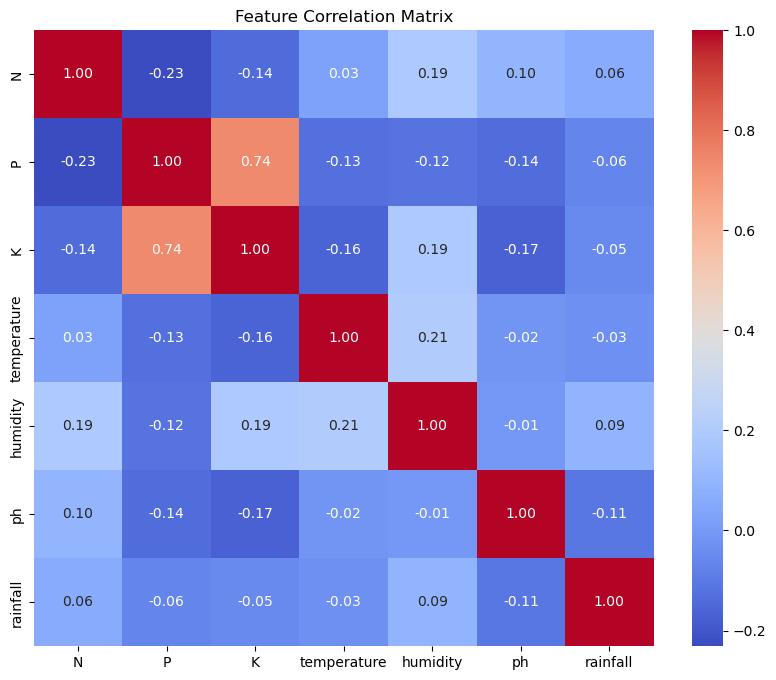

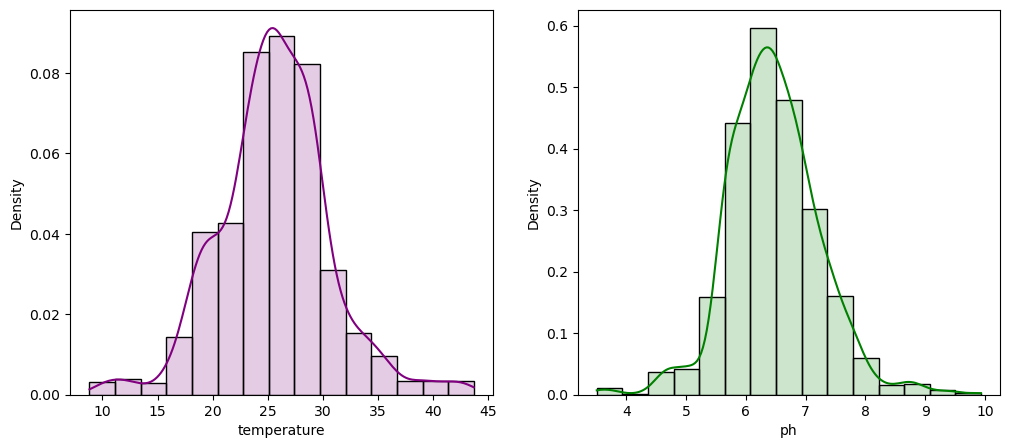

C:\Users\HP win10\AppData\Local\Temp\ipykernel_14872\3976243607.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=crops, palette="plasma_r")


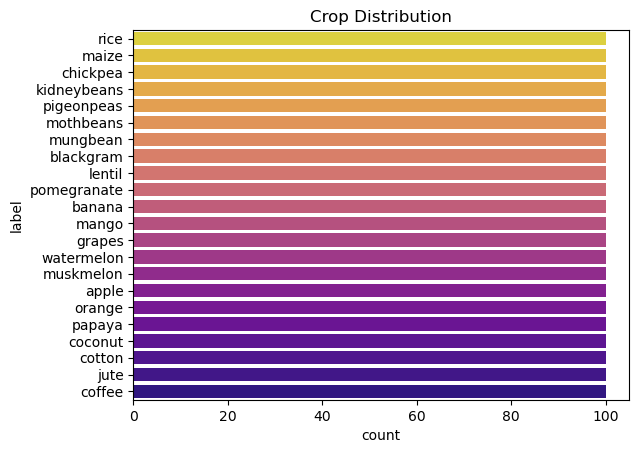

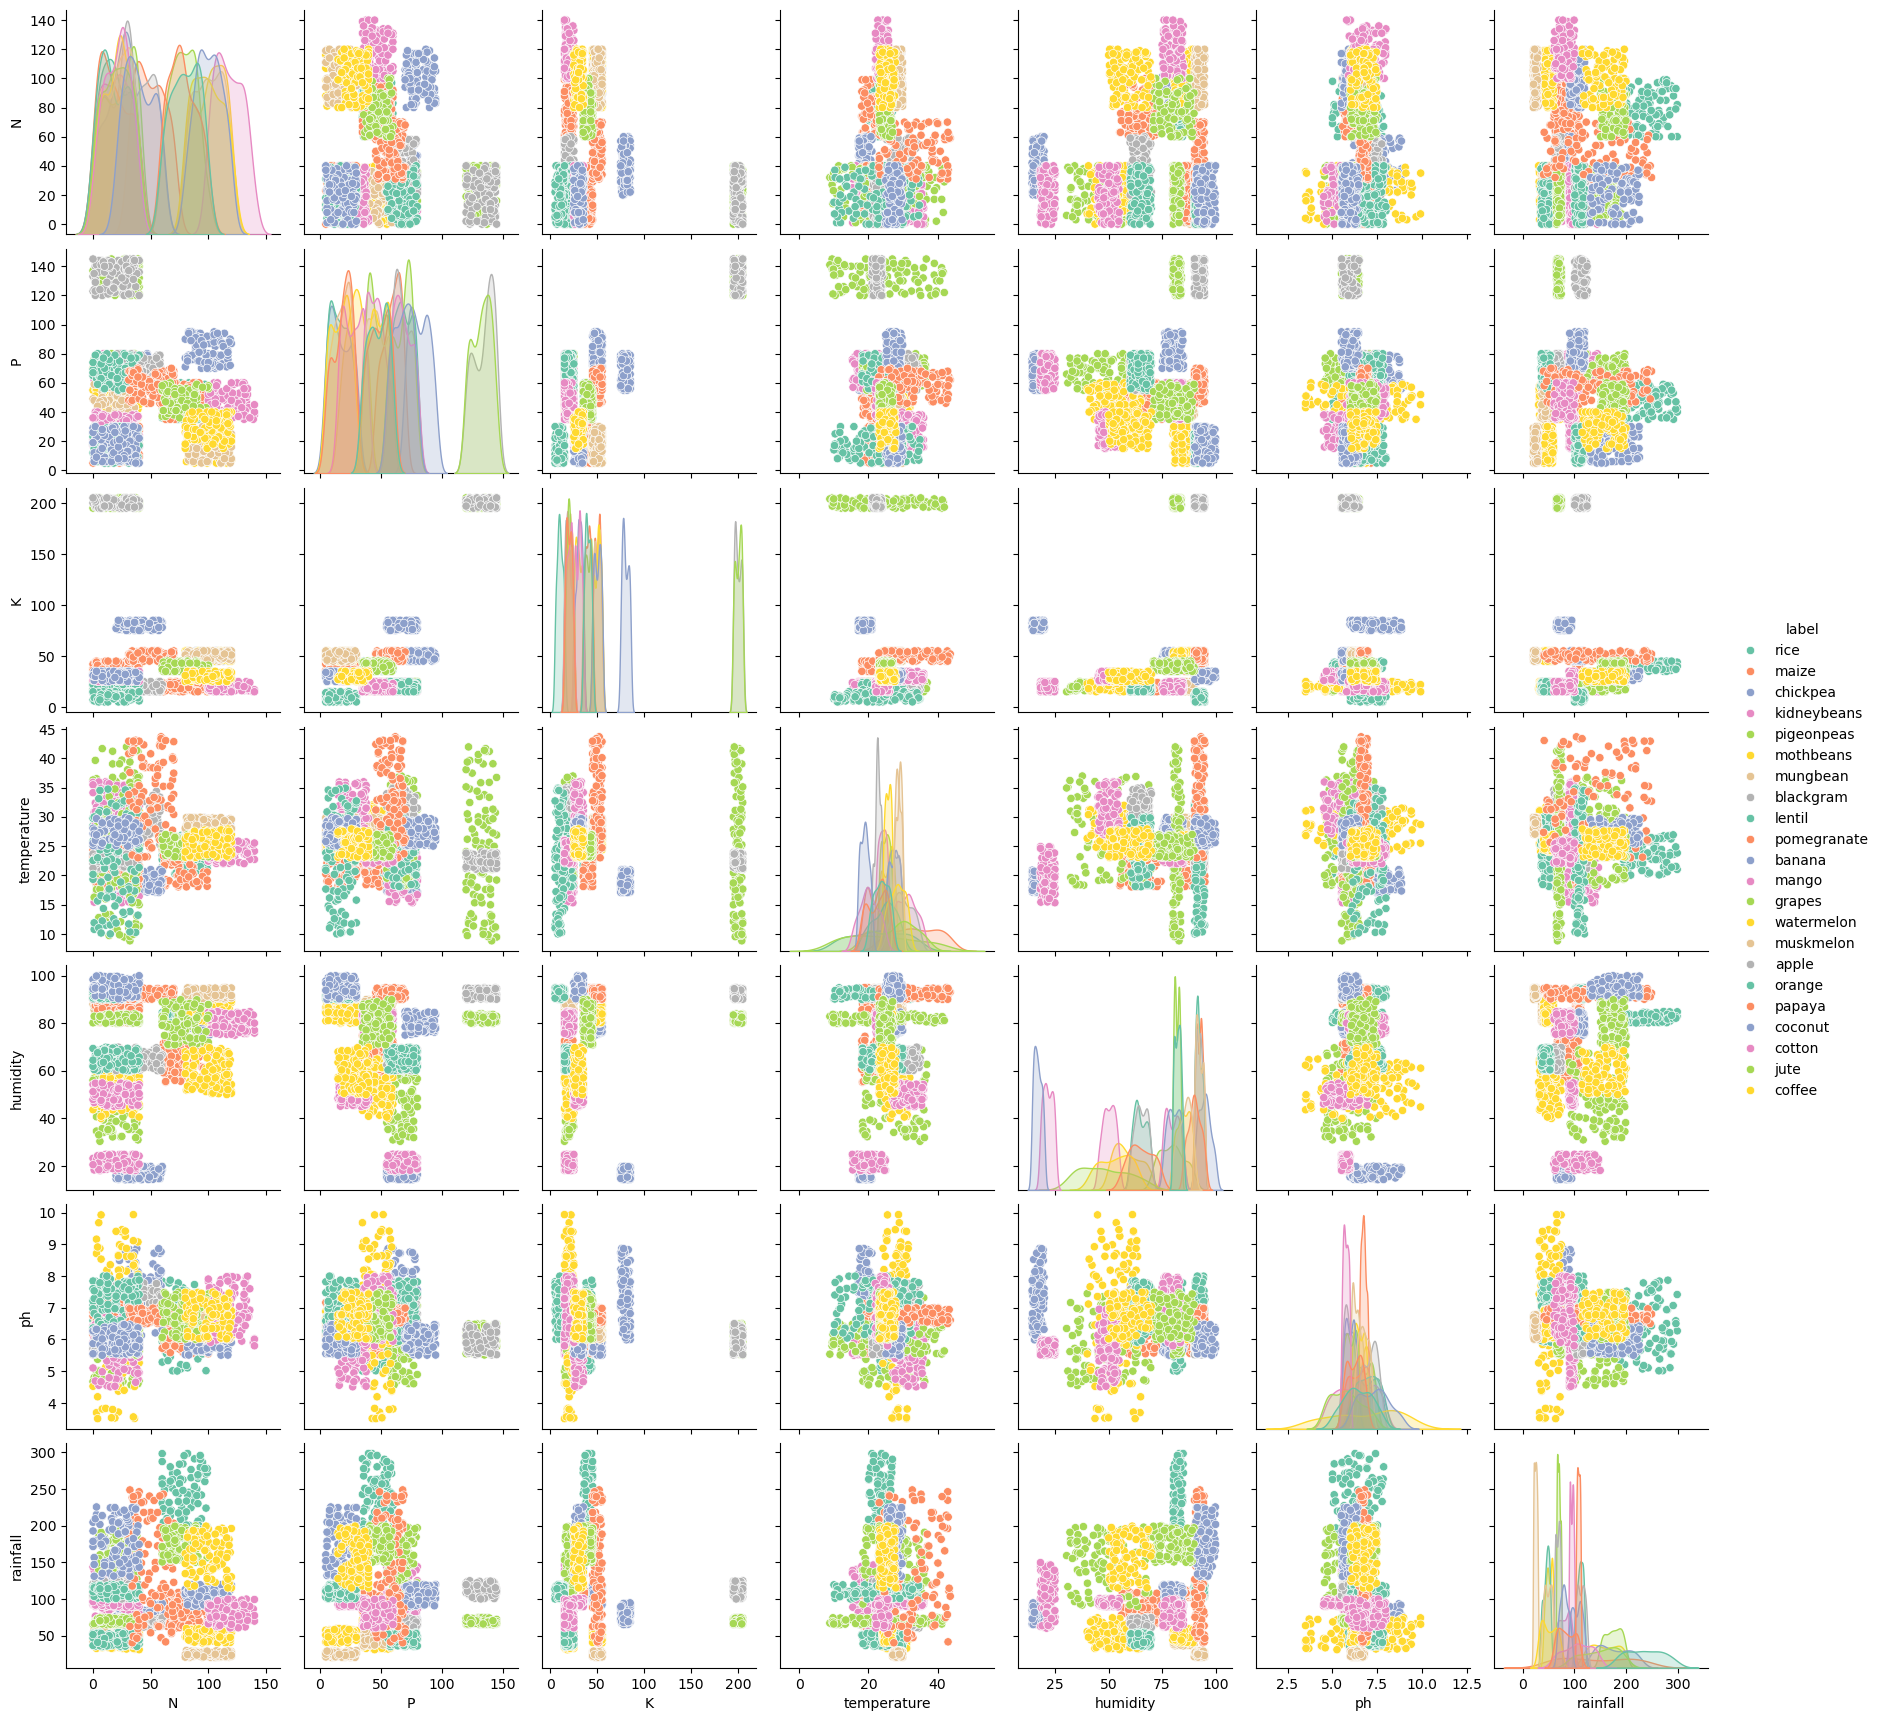

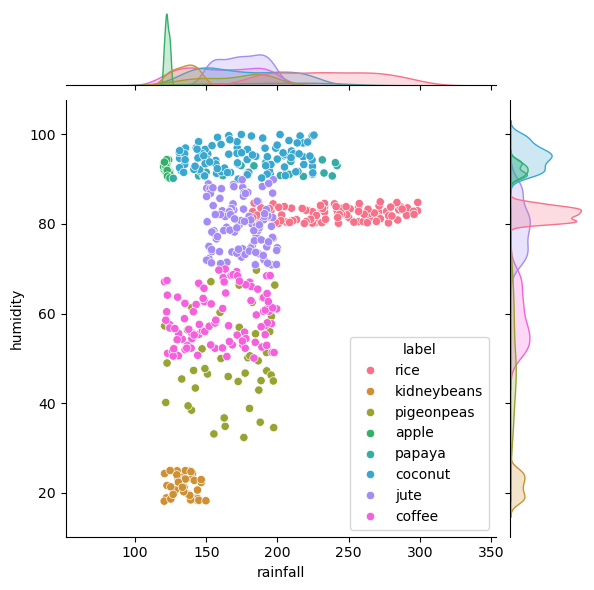

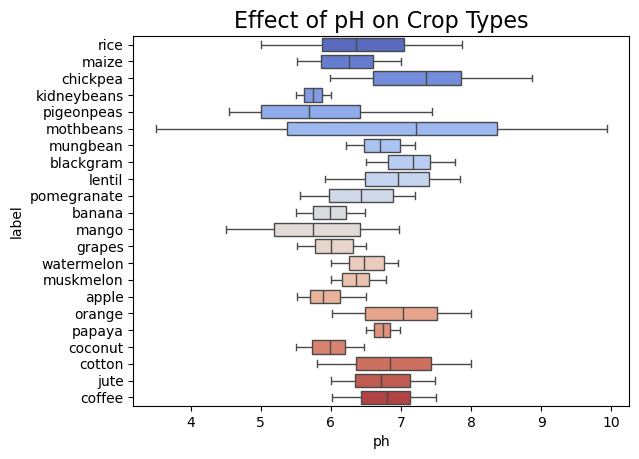

In [19]:
# All required libraries are imported here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from the local directory as CSV
file_path = r"C:\Users\HP win10\Desktop\Course Moodle\COM7003 Artificial Intelligence\crop_data.csv"
crops = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("The first five rows of the dataset:")
print(crops.head())

# Identify missing values using .isnull() function
missing_values = crops.isnull().sum()
print("\nThe missing values for each column in the dataset:")
print(missing_values)

# Check for duplicates
print("\nDuplicates in Dataset:")
print(crops.duplicated().sum())

# Check how many crops are in the dataset
print("\nAll Unique Values in Target Column:")
print(crops.label.unique())
print(crops['label'].value_counts()) # Counts the occurrence of each unique value

# EXPLORATORY DATA ANALYSIS (EDA)
# Summary statistics
print("\nDataset Summary Statistics:")
print(crops.describe())

# Use Label Encoding on target variable to make it suitable for training
label_encoder = LabelEncoder()
crops["label_encoded"] = label_encoder.fit_transform(crops["label"])

# Separate the 'Features' from the 'Target' variables
X = crops.drop(columns=["label", "label_encoded"])  # independent variable (features)
y = crops["label_encoded"]  # dependent variable (Target in numerical values)
y2 = crops["label"]  # dependent variable (Target in categorical values)
print(f"\nThe Independent Variables (Features):\n{X} {X.shape}\n\n"
     f"The Dependent Variables (Numerical Target):\n{y} {y.shape}\n\n"
     f"The Dependent Variables (Categorical Target):\n{y2} {y2.shape}")

print("\nAll Categories and Encoded Values:")
categories = list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
for category, encoded_value in categories:
    print(f"{category}: {encoded_value}")

# Group the crops based on mean values of the features
crops_grouped = crops.groupby('label').agg({
    'N': 'mean', 'P': 'mean', 'K': 'mean', 'temperature': 'mean',
    'humidity': 'mean', 'ph': 'mean', 'rainfall': 'mean',
}).reset_index()

print("\nGrouped Data by crop (Mean value):")
print(crops_grouped)

# Correlation matrix visualization
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Distribution between Temperature and pH
plt.figure(figsize=(12, 5))
# First subplot: Temperature distribution
plt.subplot(1, 2, 1)
sns.histplot(crops['temperature'], color="purple", bins=15, kde=True, stat='density', alpha=0.2)
# Second subplot: pH distribution
plt.subplot(1, 2, 2)
sns.histplot(crops['ph'], color="green", bins=15, kde=True, stat='density', alpha=0.2)
plt.show()  # Display the plot

# Checks if the data is balanced using Countplot (Removed 'hue' to simply plot the count)
sns.countplot(y='label', data=crops, palette="plasma_r")
plt.title("Crop Distribution")
plt.show()

# Using Pairplot to show the relationship between features
# Combine X and y2 to create a new DataFrame for pairplot
X_with_y2 = X.copy()
X_with_y2['label'] = y2

# Using sns.pairplot() with the 'label' column for hue
sns.pairplot(X_with_y2, hue='label', palette="Set2")
plt.show()

# Using joinplot to highlight the relationship between rainfall and temperature 
sns.jointplot(x="rainfall", y="humidity", data=crops[(crops['temperature'] < 30) & (crops['rainfall'] > 120)], hue="label")
plt.show()

# Using Boxplot to visualize the effect of pH in crops
sns.set_palette("coolwarm")  # Set the color palette
sns.boxplot(x='ph', y='label', data=crops, hue='label', palette="coolwarm")
# Title and show plot
plt.title("Effect of pH on Crop Types", fontsize=16)
plt.show()

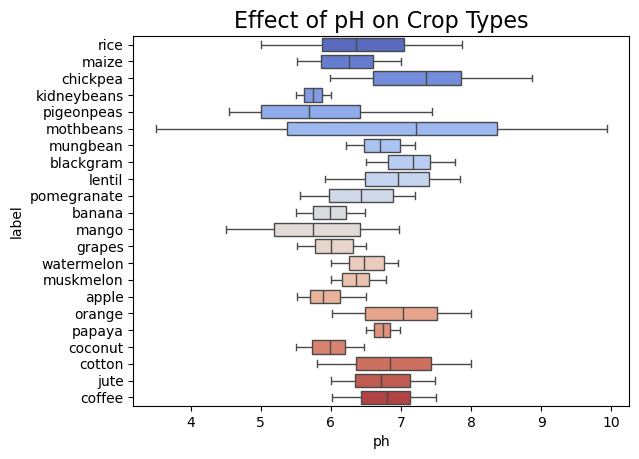

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using a colorful palette
sns.set_palette("coolwarm")  # Set the color palette

# Boxplot with 'hue' parameter to avoid warning
sns.boxplot(x='ph', y='label', data=crops, hue='label', palette="coolwarm")

# Title and show plot
plt.title("Effect of pH on Crop Types", fontsize=16)
plt.show()
